In [10]:
# Desafio Final ML - Banco Box Sintetico
# Arthur Trindade

In [11]:
# 1. Importação e Extração

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Extração: Carregar o CSV
df = pd.read_csv("/content/banco_box_sintetico.csv")

In [12]:
# 2. Transformação e Análise

print("Iniciando Transformação e Análise")

# Tratamento de dados nulos
median_renda = df['renda_mensal'].median()
df['renda_mensal'].fillna(median_renda, inplace=True)

# Criação da nova coluna: relação dívida/renda
df['relacao_divida_renda'] = df['dividas_total'] / df['renda_mensal'].replace(0, 1e-6)
print("Coluna 'relacao_divida_renda' criada com sucesso.")

Iniciando Transformação e Análise
Coluna 'relacao_divida_renda' criada com sucesso.


/tmp/ipython-input-4026331993.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['renda_mensal'].fillna(median_renda, inplace=True)


In [13]:
# 3. CSV Tratado para análise

df.to_csv("banco_tratado_para_analise.csv", index=False)
print("Arquivo 'banco_tratado_para_analise.csv' salvo com sucesso.")

Arquivo 'banco_tratado_para_analise.csv' salvo com sucesso.


In [14]:
# 4. Análise com Numpy

media_historico = np.mean(df['historico_credito'])
print(f"\nA média do histórico de crédito dos clientes é de: {media_historico:.2f} meses.")




A média do histórico de crédito dos clientes é de: 9.95 meses.



Gerando gráfico de distribuição de risco


/tmp/ipython-input-1791451661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risco_credito', data=df, order=['Baixo', 'Médio', 'Alto'], palette="viridis")


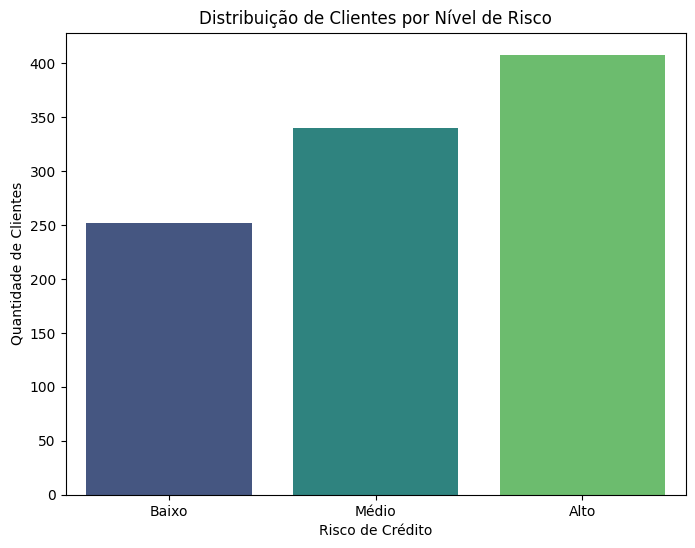

In [15]:
# 5. Visualização com Matplotlib

print("\nGerando gráfico de distribuição de risco")
plt.figure(figsize=(8, 6))
sns.countplot(x='risco_credito', data=df, order=['Baixo', 'Médio', 'Alto'], palette="viridis")
plt.title('Distribuição de Clientes por Nível de Risco')
plt.xlabel('Risco de Crédito')
plt.ylabel('Quantidade de Clientes')
plt.show()


In [16]:
# 6. Modelos de classificação e sepação em x e y
print("\Iniciando o Processo de M.L.")

# Separar dados em x e y
X = df.drop('risco_credito', axis=1)
y = df['risco_credito']

# Codificar y
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

\Iniciando o Processo de M.L.


<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
/tmp/ipython-input-4114846046.py:2: SyntaxWarning: invalid escape sequence '\I'
  print("\Iniciando o Processo de M.L.")


In [17]:
# 7. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Pré-processar os dados (fit no treino, transform em ambos)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [18]:
# 8. Treinar e avaliar modelos
models = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    predictions = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Acurácia do modelo '{name}': {accuracy*100:.2f}%")

print("\nProcesso de Machine Learning Concluído")

Acurácia do modelo 'Regressão Logística': 87.50%
Acurácia do modelo 'Árvore de Decisão': 98.50%
Acurácia do modelo 'Random Forest': 96.50%

Processo de Machine Learning Concluído


In [20]:
# 9. Baixar o melhor modelo

import joblib

best_model = "Árvore de Decisão"


joblib.dump(best_model, "redfit_model.pkl")



['redfit_model.pkl']